# IMPORTING PACKAGES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
import re
from sklearn import metrics
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /Users/vivek/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Descriptive analysis

In [2]:
df=pd.read_csv("WELFake_Dataset.csv")  # reading the welfake dataset 
df=df.iloc[:,1:]  #using iloc to filterout 0 index column out
df.head(5) #reading the head file


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
df.shape # checking the shape 

(72134, 3)

In [70]:
df.info()  # checking the datatype of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [71]:
df.describe() # checking the percentile distribution of data of numeric columnss

,label
count,72134.000000
mean,0.514404
std,0.499796
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# EDA (Exploratory Data Analysis)

In [72]:
#  checking the null value present in the dataframe or not .
df_1=df.iloc[:,1:]  #removed the first column with 0 index 
df_1.isna().sum()  # found there are 39 null values in text columns

text     39
label     0
dtype: int64

In [73]:
df_1=df_1[~(df_1['text'].isna())]  # removing the null values from text column 

In [74]:
df_1.reset_index(inplace=True,drop=True)  # resetting the index

In [75]:
#removing all the punctuations
df_1['text'].replace("[^a-zA-Z]"," ",regex=True,inplace=True)

In [79]:
# checking the head wether punctuations removed or not 
df_1['text']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already 
2         Now  most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS    Sarmat missile  dubbed Satan    will...
                               ...                        
72090    WASHINGTON  Reuters    Hackers believed to be ...
72091    You know  because in fantasyland Republicans n...
72092    Migrants Refuse To Leave Train At Refugee Camp...
72093    MEXICO CITY  Reuters    Donald Trump s combati...
72094    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72095, dtype: object

In [80]:
df_1['text']=df_1['text'].str.lower()  # converted into lowercase 
df_1['text']= df_1['text'].str.split()  # splitting the string in a single object and make it in to list

In [81]:
df_1['text']

0        [no, comment, is, expected, from, barack, obam...
1        [did, they, post, their, votes, for, hillary, ...
2        [now, most, of, the, demonstrators, gathered, ...
3        [a, dozen, politically, active, pastors, came,...
4        [the, rs, sarmat, missile, dubbed, satan, will...
                               ...                        
72090    [washington, reuters, hackers, believed, to, b...
72091    [you, know, because, in, fantasyland, republic...
72092    [migrants, refuse, to, leave, train, at, refug...
72093    [mexico, city, reuters, donald, trump, s, comb...
72094    [goldman, sachs, endorses, hillary, clinton, f...
Name: text, Length: 72095, dtype: object

In [82]:
#using the porter stemmer and converting rows of text column 
ps=PorterStemmer()
for i in range(0,len(df_1)):
    df_1['text'][i]=[ps.stem(word)  for word in df_1['text'][i] if word not in set(stopwords.words('english'))]
    df_1['text'][i]=" ".join(df_1['text'][i])
    

<ipython-input-82-4e2e240c363b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['text'][i]=[ps.stem(word)  for word in df_1['text'][i] if word not in set(stopwords.words('english'))]
<ipython-input-82-4e2e240c363b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['text'][i]=" ".join(df_1['text'][i])


In [143]:
df_1.isna().sum() # checking the null values found 793

Unnamed: 0      0
text          793
label           0
dtype: int64

In [17]:
df_1.dropna(axis=0,inplace=True) # dropping the null values

In [145]:
df_1.isna().sum() #checking again the null values 

Unnamed: 0    0
text          0
label         0
dtype: int64

In [4]:
X=df_1['text']  # converting df_1 in to x >>>. test
Y=df_1['label']  # converting df_1 labesls as y 


In [5]:
Y.head(3) #checking y 

0    1
1    1
2    1
Name: label, dtype: int64

In [6]:
X.head()  #checking x

0    comment expect barack obama member fyf fukyofl...
1                            post vote hillari alreadi
2    demonstr gather last night exercis constitut p...
3    dozen polit activ pastor came privat dinner fr...
4    rs sarmat missil dub satan replac ss fli mile ...
Name: text, dtype: object

In [5]:
#SPLITTING TH DATA IN TRAIN AND TEST 80-20 PERCENT 
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=80, test_size=0.20)

In [6]:
#checking the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57041,)
(57041,)
(14261,)
(14261,)


1    29061
0    27980
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

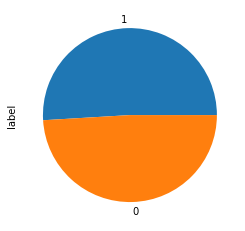

In [33]:
#seeing the size y_train before
print(y_train.value_counts())
y_train.value_counts().plot.pie()

1    29061
0    27980
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

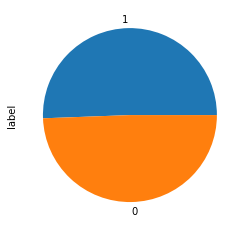

In [167]:
#seeing the size y_test before
print(y_train.value_counts())
y_test.value_counts().plot.pie()

In [7]:
# using count vectorizer to convert text in to numeric columns 

In [8]:
countvector=CountVectorizer(ngram_range=(2,2))

In [9]:
#fitting CountVectorizer in to X_train 
X_train=countvector.fit_transform(X_train)


In [10]:
X_train  #checking x_train 

<57041x5118195 sparse matrix of type '<class 'numpy.int64'>'
	with 16238744 stored elements in Compressed Sparse Row format>

In [11]:
# checking x_test and after transforming
X_test=countvector.transform(X_test)
X_test

<14261x5118195 sparse matrix of type '<class 'numpy.int64'>'
	with 3312708 stored elements in Compressed Sparse Row format>

# Modelling - Logistic regression with balanced data 

In [172]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression  #importing some packages 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV   # gridsearchcv is used for hyperparameter tunning

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000,10000]}
cv_num = KFold(n_splits=5, shuffle=True, random_state=4)

#cross validation using gridsearchcv 
logistic_cv_model = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', #here using roc_auc score for accuracy metrices 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fitting in to x-train and y-train
logistic_cv_model.fit(X_train, y_train)

#FINDING THE BEST AUC_ROC SCORE 
print('finding the best auc_roc score in the given parameter : ', logistic_cv_model.best_score_)

#FINDING THE BEST HYPERPARAMETER
print('finding the best hyperparameter C score in the given parameter: ', logistic_cv_model.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
finding the best auc_roc score in the given parameter :  0.9879942308823845
finding the best hyperparameter C score in the given parameter:  {'C': 1}


In [10]:
#NOW BUILDING THE MODEL WITH THE CORRECT PARAMETER
from sklearn.linear_model import LogisticRegression 
# USING C=0.01 WHICH WE FOUNND FROM GRIDSEARCHCV
LG = LogisticRegression(C=1)
# BUILDING MODEL WITH TRAIN DATA 
LG.fit(X_train, y_train)

LogisticRegression(C=1)

In [11]:
# PREDICTION DONE ON TRAIN SET 
y_pred = LG.predict(X_train)
y_pred# getting the data of y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_train, y_pred)) # PRINTING THE CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27980
           1       1.00      1.00      1.00     29061

    accuracy                           1.00     57041
   macro avg       1.00      1.00      1.00     57041
weighted avg       1.00      1.00      1.00     57041



In [16]:
# ROC Curve function

def drawing_roc_auc_viz_score( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

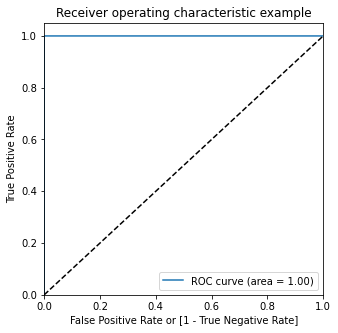

In [17]:
# Plot the ROC curve
y_pred = LG.predict_proba(X_train)[:,1]
drawing_roc_auc_viz_score(y_train, y_pred)

In [64]:
# PREDICTION ON TEST DATA 
# X_test=countvector.transform(X_test)
y_pred_1 = LG.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7046
           1       0.93      0.97      0.95      7215

    accuracy                           0.95     14261
   macro avg       0.95      0.95      0.95     14261
weighted avg       0.95      0.95      0.95     14261



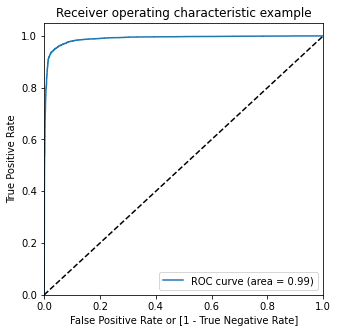

In [65]:
# Plot the ROC curve
y_pred_1 = LG.predict_proba(X_test)[:,1]
drawing_roc_auc_viz_score(y_test, y_pred_1)

###  Found a good accuracy and score of about 0.99 in logistic regression 

# 2. Decision Tree 

In [67]:
# CREATING PARAMETER LIST
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV   # gridsearchcv is used for hyperparameter tunning
para_C = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [50,100,150]}

#CREATING A DECISION TREE
DT = DecisionTreeClassifier()

#USING AGIAN GRIDSEARCHCV FOR HYPERPARAMETER TUNING
DT_grid = GridSearchCV(estimator = DT, 
                           param_grid = para_C, 
                           scoring= 'roc_auc',
                            #USING HER 3 CROSS FOLD 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
DT_grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [68]:
DT_grid.best_score_  # getting the best score 

0.8667731003609352

In [69]:
DT_grid.best_estimator_ # finding the best hyperparameter

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50)

In [70]:
# BUILDING DECISION TREE WITH OPTIMAL PARAMETER 
DT_NEW = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

DT_NEW.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [71]:
y_pred = DT_NEW.predict(X_train)
print(classification_report(y_train, y_pred)) 

              precision    recall  f1-score   support

           0       0.87      0.70      0.78     27980
           1       0.76      0.90      0.82     29061

    accuracy                           0.80     57041
   macro avg       0.82      0.80      0.80     57041
weighted avg       0.81      0.80      0.80     57041



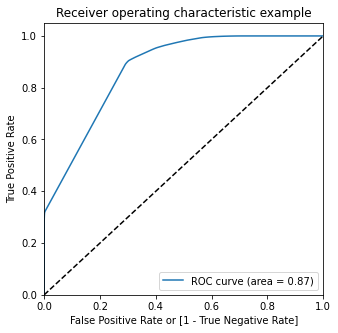

In [72]:
# Predicted probability
y_pred = DT_NEW.predict_proba(X_train)[:,1]

# Plottin  the ROC curve
drawing_roc_auc_viz_score(y_train, y_pred)

In [73]:
#now on test data 
y_pred_1 = DT_NEW.predict(X_test)
print(classification_report(y_test, y_pred_1)) 

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      7046
           1       0.75      0.90      0.82      7215

    accuracy                           0.80     14261
   macro avg       0.81      0.80      0.80     14261
weighted avg       0.81      0.80      0.80     14261



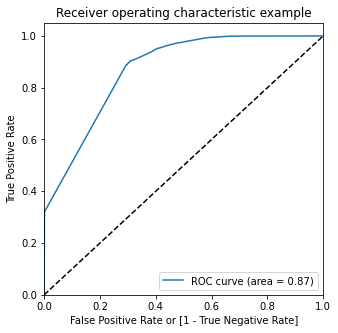

In [74]:
# Predicted probability
y_pred_1 = DT_NEW.predict_proba(X_test)[:,1]

# Plottin  the ROC curve
drawing_roc_auc_viz_score(y_test, y_pred_1)

### Result - Model perform a bit weak as compare to logistic regression with score 0.87 in test

# 3. Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  

# CREATING PARAMETER LIST

para_C = {
 'max_depth': [10, 20, 30],
#  'max_features': range(3,17),
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [8,10,15]}

#CREATING A DECISION TREE
RF = RandomForestRegressor()

#USING AGIAN GRIDSEARCHCV FOR HYPERPARAMETER TUNING
RF_grid = GridSearchCV(estimator = RF, 
                           param_grid = para_C, 
                           scoring= 'roc_auc',
                           cv = 2, #USING HER 3 CROSS FOLD 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
RF_grid.fit(X_train,y_train)


Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [8, 10, 15]},
             scoring='roc_auc', verbose=1)

In [15]:
RF_grid.best_estimator_ # finding the best hyperparameter

RandomForestRegressor(max_depth=30, n_estimators=15)

In [17]:
# RF_grid RESULTS 
RF_grid_results = pd.DataFrame(RF_grid.cv_results_)
RF_grid_results.head(4)  # fetching top 4 results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1151.957043,7.681966,2.792393,0.310024,10,1,2,8,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.860475,0.859622,0.860048,0.000427,81
1,1398.551013,2.674279,3.060249,0.100450,10,1,2,10,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.868708,0.871620,0.870164,0.001456,59
2,2091.781454,39.904396,4.017715,0.249593,10,1,2,15,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.867971,0.864724,0.866347,0.001623,65
3,1130.755464,20.114762,2.654983,0.003285,10,1,5,8,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.865160,0.863191,0.864175,0.000984,71


In [22]:
RF_grid_results[(RF_grid_results['param_max_depth']==30) & (RF_grid_results['param_n_estimators']==15)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
56,4215.265550,16.929109,5.382110,0.034955,30,1,2,15,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.932656,0.933413,0.933034,0.000379,1
59,4092.468845,4.388068,5.825022,0.263538,30,1,5,15,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.933167,0.931352,0.932260,0.000907,4
62,4007.283181,13.008729,5.551080,0.534036,30,1,10,15,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.935649,0.930281,0.932965,0.002684,3
65,4125.231264,7.707099,5.762100,0.289104,30,2,2,15,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_...",0.933878,0.928990,0.931434,0.002444,7
68,4169.533480,31.382620,5.508115,0.518139,30,2,5,15,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_...",0.934158,0.931858,0.933008,0.001150,2
71,4052.521965,17.585336,5.327831,0.039818,30,2,10,15,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_...",0.931958,0.931269,0.931613,0.000344,6
74,5296.534329,114.275519,8.660680,0.742446,30,4,2,15,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.932470,0.927104,0.929787,0.002683,17
77,6272.331521,40.375268,6.504344,0.767754,30,4,5,15,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.931861,0.929319,0.930590,0.001271,10
80,4801.892527,13.566133,4.154777,0.213920,30,4,10,15,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.932399,0.928745,0.930572,0.001827,11


In [23]:
# BUILDING RANDOM FOREST WITH OPTIMAL PARAMETER 
RF_NEW = RandomForestRegressor( n_estimators=15,
                                  random_state = 100,
                                  max_depth=30, 
                                  min_samples_leaf=4,
                                  min_samples_split=5)

RF_NEW.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=15, random_state=100)

In [24]:
y_pred = RF_NEW.predict(X_train)# FINDING THE Y PREDICTION VALUE  
y_pred

array([0.28095211, 0.74855078, 0.74855078, ..., 0.06678209, 1.        ,
       0.96666667])

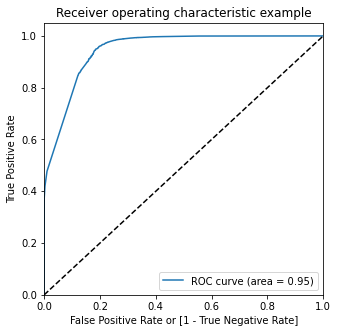

In [27]:
# Plottin  the ROC curve
drawing_roc_auc_viz_score(y_train, y_pred)

In [28]:
#now on test data 
y_pred_1 = RF_NEW.predict(X_test)

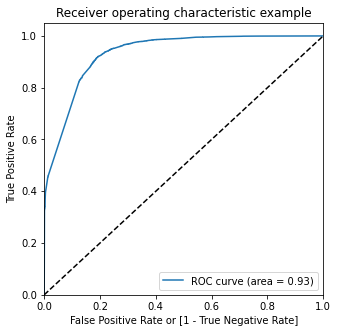

In [29]:
# Plottin  the ROC curve
drawing_roc_auc_viz_score(y_test, y_pred_1)

### RESULT - ROC CURVE IS 0.93

# 4. SVM MODEL 

In [ ]:
# defining parameter range
from sklearn.model_selection import GridSearchCV  
from sklearn.svm import SVC
param = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
 
SVC_grid = GridSearchCV(SVC(), param,cv = 2 ,verbose = 3)
 
# fitting the model for grid search
SVC_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=90.5min
[CV 2/2] END .......C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=120.6min
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.510 total time=78.0min
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=62.6min
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.683 total time=62.5min
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.668 total time=62.0min
[CV 1/2] END .........C=1, gamma=1, kernel=rbf;, score=0.596 total time=111.3min
[CV 2/2] END .........C=1, gamma=1, kernel=rbf;, score=0.594 total time=105.5min
[CV 1/2] END .......C=1, gamma=0.1, kernel=rbf;, score=0.622 total time=102.6min
[CV 2/2] END .......C=1, gamma=0.1, kernel=rbf;, score=0.620 total time=111.2min
[CV 1/2] END ......C=1, gamma=0.01, kernel=rbf;, score=0.837 total time=135.0min
[CV 2/2] END ......C=1, gamma=0.01, kernel=rbf;, 

In [12]:
# BUILDING XGBOOST WITH OPTIMAL PARAMETER 
from sklearn.svm import SVC
SVC_NEW = SVC(C= 10, gamma= 0.01,kernel='rbf')
SVC_NEW.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

In [13]:
y_pred = SVC_NEW.predict(X_train)# FINDING THE Y PREDICTION VALUE  
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred)) # FINDING THE CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27980
           1       1.00      1.00      1.00     29061

    accuracy                           1.00     57041
   macro avg       1.00      1.00      1.00     57041
weighted avg       1.00      1.00      1.00     57041



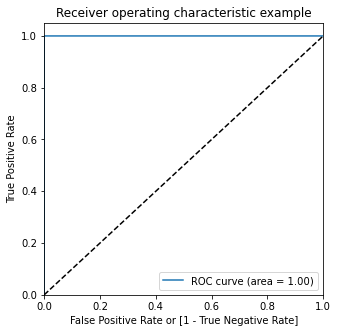

In [19]:
# Plottin  the ROC curve
drawing_roc_auc_viz_score(y_train, y_pred)

In [20]:
#now on test data 
y_pred_1 = SVC_NEW.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_1)) # FINDING THE CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7046
           1       0.95      0.85      0.90      7215

    accuracy                           0.90     14261
   macro avg       0.91      0.90      0.90     14261
weighted avg       0.91      0.90      0.90     14261



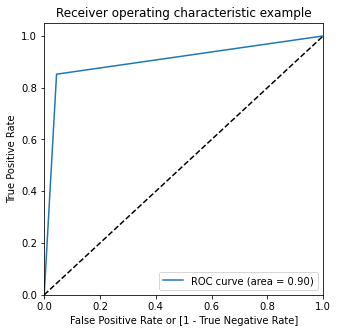

In [22]:
# Plottin  the ROC curve

drawing_roc_auc_viz_score(y_test, y_pred_1)

### Test accuracy for svm model comes out to be 0.90 

# 5. XG-BOOST 

In [23]:
from xgboost import XGBClassifier  # IMPORTING XGBClassifier
from sklearn.model_selection import GridSearchCV  
# specify range of hyperparameters
para = {'learning_rate': [0.1,0.2,0.3,0.6], 
             'subsample': [0.3,0.5, 0.6, 0.9]}          


# CALLING THE XGBOOST MODEL 
XGB = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
XGB_cv = GridSearchCV(estimator = XGB, 
                        param_grid = para, 
                        scoring= 'roc_auc', 
                        cv = 3, #using 3 fold 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
XGB_cv.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.6],
                         'subsample': [0.3, 0.5, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [24]:
#  XGB_cv RESULTS 
XGB_cv_results = pd.DataFrame(XGB_cv.cv_results_)
XGB_cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,86.170034,4.785763,1.042963,0.150891,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.944925,0.942923,0.944651,0.944166,0.000886,14,0.946704,0.946689,0.946492,0.946628,0.000097
1,92.870722,0.795583,0.975505,0.135656,0.1,0.5,"{'learning_rate': 0.1, 'subsample': 0.5}",0.945152,0.942582,0.944884,0.944206,0.001154,13,0.946962,0.946763,0.946701,0.946809,0.000111
2,93.363830,1.182031,0.893251,0.108294,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.944917,0.942168,0.944072,0.943719,0.001149,16,0.946461,0.946562,0.945889,0.946304,0.000296
3,90.926619,0.312244,0.823634,0.000966,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.944349,0.942139,0.945228,0.943905,0.001299,15,0.946492,0.946346,0.946527,0.946455,0.000079
4,88.823792,0.772810,0.846047,0.019073,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.960816,0.958667,0.960652,0.960045,0.000977,12,0.963924,0.962373,0.963409,0.963235,0.000645


In [25]:
XGB_cv.best_score_  # getting the best score 

0.9764156907505873

In [26]:
XGB_cv.best_estimator_ # finding the best hyperparameter

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
# BUILDING XGBOOST WITH OPTIMAL PARAMETER 
XGB_NEW=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGB_NEW.fit(X_train,y_train)

C:\Users\PVIDHYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred = XGB_NEW.predict(X_train)# FINDING THE Y PREDICTION VALUE  
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [51]:
print(classification_report(y_train, y_pred)) # FINDING THE CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     27980
           1       0.91      0.95      0.93     29061

    accuracy                           0.93     57041
   macro avg       0.93      0.93      0.93     57041
weighted avg       0.93      0.93      0.93     57041



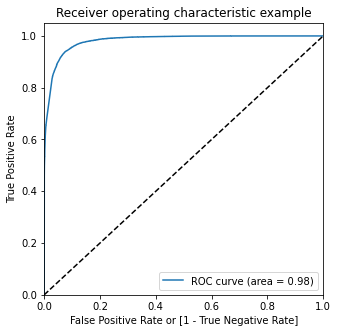

In [52]:
# Plottin  the ROC curve
y_pred = XGB_NEW.predict_proba(X_train)[:,1]
drawing_roc_auc_viz_score(y_train, y_pred)

In [54]:
#now on test data 
y_pred_1 = XGB_NEW.predict(X_test)
y_pred_1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred_1)) # FINDING THE CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7046
           1       0.90      0.94      0.92      7215

    accuracy                           0.92     14261
   macro avg       0.92      0.92      0.92     14261
weighted avg       0.92      0.92      0.92     14261



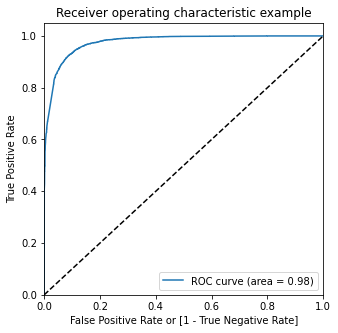

In [56]:
# Plottin  the ROC curve
y_pred_1 = XGB_NEW.predict_proba(X_test)[:,1]
drawing_roc_auc_viz_score(y_test, y_pred_1)

# SOLUTION:- HENCE CHOOSING XG-BOOST MODEL FOR PREDICTION ,AS IT PEROFRMS BETTER IN TRAIN AND TEST WITH 91% ACCURACY ,0.91% F1-score 